# Мошенничество с кредитными картами


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv("fraudTrain1.csv", sep=',', decimal='.')
dataset.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0.0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0.0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0.0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0.0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0.0


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

С помощью LabelEncoder преобразуем категориальные данные в числовой формат

In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objList = dataset.select_dtypes(include = "object").columns
print (objList)
for feat in objList:
    dataset[feat] = le.fit_transform(dataset[feat].astype(str))

print (dataset.info())

Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5723 non-null   int64  
 1   Time        5723 non-null   int64  
 2   V1          5723 non-null   float64
 3   V2          5723 non-null   float64
 4   V3          5723 non-null   float64
 5   V4          5723 non-null   float64
 6   V5          5723 non-null   float64
 7   V6          5722 non-null   float64
 8   V7          5722 non-null   float64
 9   V8          5722 non-null   float64
 10  V9          5722 non-null   float64
 11  V10         5722 non-null   float64
 12  V11         5722 non-null   float64
 13  V12         5722 non-null   float64
 14  V13         5722 non-null   float64
 15  V14         5722 non-null   float64
 16  V15         5722 non-null   float64
 17  V16         5722 non-null   float64
 18  V17         5722 non-null   float64
 19  V

In [ ]:
dataset

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,...,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0.0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,...,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0.0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,...,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0.0
3,3,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0.0
4,4,132,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,...,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,10.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5718,5718,134681,1.722190,-1.544992,-0.579818,-0.135338,-1.183616,0.256367,-0.998013,0.164815,...,0.042279,0.301766,0.081418,0.705968,-0.407112,0.396424,-0.027482,-0.016114,182.44,0.0
5719,5719,134736,2.254294,-1.408848,-1.062149,-1.628790,-1.160146,-0.609920,-1.052749,-0.161185,...,-0.074638,0.258042,0.123125,-0.342859,-0.096894,-0.098236,-0.000539,-0.064197,29.89,0.0
5720,5720,134748,0.039663,-0.680268,1.613206,-2.010429,-1.462215,0.558458,-1.036120,0.214050,...,0.005665,0.520100,0.013127,-0.483171,-1.049133,-0.149560,0.160146,0.185278,39.00,0.0
5721,5721,134774,-1.381210,1.052265,1.817411,2.038599,0.443756,1.293033,1.633641,0.169179,...,0.118618,0.409055,-0.434314,-0.417954,1.099224,0.075946,-0.072958,-0.013562,180.13,0.0


In [ ]:
occ = dataset.Class.value_counts()
occ

0.0    5708
1.0      14
Name: Class, dtype: int64

При изучении данных, можно заметить, что они несбалансированы

In [ ]:
ratio_cases = occ/len(dataset.index)
print(f'Процент мошеннических транзакций: {ratio_cases[1]}\nПроцент немошеннических транзакций: {ratio_cases[0]}')

Процент мошеннических транзакций: 0.0024462694391053645
Процент немошеннических транзакций: 0.9973789970295299


In [ ]:
# Функция разбиения данных
def prep_data(df: pd.DataFrame):
   
    X = df.iloc[:, 2:22].values
    y = df.Class.values
    return X, y

In [ ]:
# Функция для построения графика
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Класс #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Класс #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [ ]:
# X- категории, y - класс предсказания
X, y = prep_data(dataset)

In [ ]:
import matplotlib.pyplot as plt

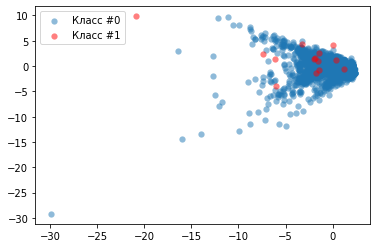

In [ ]:
# График распределения по классам
plot_data(X, y)

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_over, y_over = oversample.fit_resample(X, y)

ValueError: ignored

In [ ]:
from imblearn.over_sampling import SMOTE

# Метод ресемплинга
method = SMOTE()

# Измененный датасет
X_resampled, y_resampled = method.fit_sample(X, y)

In [ ]:
# Функция сравнения графиков
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Класс #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Класс #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Оригинальный баланс')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Класс #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Класс #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

In [ ]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

In [ ]:
compare_plot(X, y, X_over, y_over, method='RUS')

Обучим классическую модель классификации  - LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = X_resampled
y = y_resampled

In [ ]:
# Разбиение данных на обучающую и тестовую части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Создаем модель логистической регрессии
model = LogisticRegression(solver='liblinear')

In [ ]:
# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

In [ ]:
# Сохраняем предсказания модели
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, classification_report, confusion_matrix

In [ ]:
y_predicted

In [ ]:
y_test

In [ ]:
# Сравниваем предсказания с истинными значениями при помощи метрики r^2 
r2_score(y_test, y_predicted)

In [ ]:
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
print('Confusion matrix:\n', conf_mat)

In [ ]:
scores = model.predict_proba(X_test)

scores = scores[:, 1]


In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, scores)

In [ ]:
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# import the methods
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, accuracy_score

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

In [ ]:
# Obtain model probabilities
probs = model.predict_proba(X_test)

# Print ROC_AUC score using probabilities
print(roc_auc_score(y_test, probs[:, 1]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)
predicted = modelRF.predict(X_test)
print(f'Accuracy Score:\n{accuracy_score(y_test, predicted)}')

In [ ]:
r2_score(y_test, y_predicted)

In [ ]:
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

In [ ]:
scores = modelRF.predict_proba(X_test)

scores = scores[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, scores)

In [ ]:
print(roc_auc_score(y_test, scores))

In [ ]:
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
cat = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

In [ ]:
cat.fit(X_train, y_train)

In [ ]:
y_pred= cat.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%(cat, acc))

In [ ]:
average_precision = average_precision_score(y_test, y_pred)
average_precision 

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

In [ ]:
scores = cat.predict_proba(X_test)

scores = scores[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, scores)

In [ ]:
print(roc_auc_score(y_test, scores))

In [ ]:
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)


In [ ]:
y_pred= xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%(cat, acc))

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

In [ ]:
scores = xgb.predict_proba(X_test)

scores = scores[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, scores)

In [ ]:
print(roc_auc_score(y_test, scores))

In [ ]:
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# Using GridSearchCV
from sklearn.model_selection import GridSearchCV
# Create the parameter grid
param_grid = {
'max_depth': [80, 90, 100, 110],
'max_features': [2, 3],
'min_samples_leaf': [3, 4, 5],
'min_samples_split': [8, 10, 12],
'n_estimators': [100, 200, 300, 1000]
}

# Define which model to use
from sklearn.ensemble import RandomForestRegressor
model = RandomForestClassifier()
# Instantiate the grid search model
grid_search_model = GridSearchCV(estimator = model,
 param_grid = param_grid, cv = 5,
n_jobs = -1, scoring='f1')

# Fit the model to our training data and obtain best parameters
grid_search_model.fit(X_train, y_train)
grid_search_model.best_params_

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
import keras
from keras import backend as K
from keras.layers import Activation

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])